# PART 3 Load data
This process perform load data action to sqlite. \
First step we need to create table and schema \
Second, load data from tmp_data folder that have prefix name is "prep" + {search_term} and then load data to sqlite 

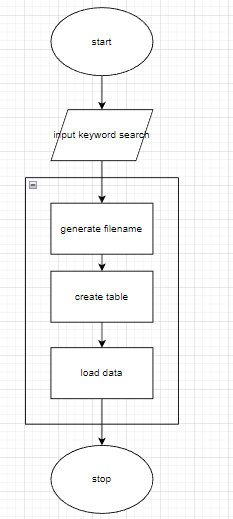

In [5]:
search_term = 'keychron k4'

____
## 3.1 Create table 
create table name is "product_price" to collect data that we process on last steps using sqlite database

In [1]:
import sqlite3
import pandas as pd

TABLE_NAME = 'product_price'
TEMP_DATA = '../tmp_data'
CONFIG = '../config'
def sqlite_connect():
    return sqlite3.connect(f'{CONFIG}/product_price_demo.db')
    
def migrate_table():
    conn = sqlite_connect()
    cursor = conn.cursor()

    cursor.execute(f""" CREATE TABLE if not exists {TABLE_NAME} (
        "product_name" varchar NOT NULL,
        "price" float8 NOT NULL,
        "store_name" varchar,
        "sold" integer,
        "brand_name" varchar,
        "specification" varchar,
        "platform" varchar,
        "search" varchar,
        "alink" varchar,
        "created_at" TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL,
        "updated_at" TIMESTAMP DEFAULT CURRENT_TIMESTAMP NOT NULL,
        "deleted_at" TIMESTAMP,
        PRIMARY KEY ("product_name", "store_name", "platform")
        )"""
    )
    print('migrate table success')
    conn.commit()
    conn.close()

In [2]:
# run migrate table and schema
migrate_table()

migrate table success


____
## 3.2 Load data
- Get clean data from tmp_data folder by  prep_{search_term}
- Load data to database

In [6]:
def load_data(search_term):
  
  filename = search_term.replace(' ','_')
  df = pd.read_csv(f'{TEMP_DATA}/prep_{filename}.csv')
  
  conn = sqlite_connect()
  cursor = conn.cursor()
  
  df.to_sql(TABLE_NAME, conn, if_exists='replace', index=False)
  
  print(f'load data ({len(df)}) success')
  conn.commit()
  conn.close()
  
  
load_data(search_term)

load data (176) success
